In [1]:
#imports and data

import tarfile
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

dataset_1 = pq.ParquetDataset("hitdata7days")
dataset_2 = pq.ParquetDataset("hitdata7days 2")

columns = ['ip','newvisit','hourlyvisitor','checkoutthankyouflag'\
          ,'productfindingmethods', 'evar23', 'post_evar30', \
           'post_evar22', 'post_evar19', 'evar83', 'prop29', 'visitnumber', 'visitpagenum']
df_all = dataset_1.read(columns=columns).combine_chunks()
df_all =df_all.to_pandas()
df_all

,ip,newvisit,hourlyvisitor,checkoutthankyouflag,productfindingmethods,evar23,post_evar30,post_evar22,post_evar19,evar83,prop29,visitnumber,visitpagenum,visitday
0,173.224.189.135,0,1,0,None,None,0.1315,11,3.9,None,None,6,168,10
1,104.52.174.100,0,0,0,None,5067566325,0.7894,6,4.8,529,Mature,1,2,10
2,68.106.111.203,0,0,0,None,3945406345,None,0,0,None,Prospect,10,143,10
3,12.138.10.179,0,0,0,None,3239177254,29.375,4,4.8,507,Mature,2,55,10
4,173.205.178.243,0,0,0,None,5121337428,0.0986,1,5,455,Emerging,2,34,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458604,71.94.28.69,0,0,0,wid,3887959950,12.9934,0,0,503,Mature,4,17,10
6458605,97.114.97.145,0,0,0,None,2829062646,0.1973,161,4.2,485,Mature,61,181,10
6458606,66.169.187.66,1,1,0,None,2875838112,0.7565,None,None,491,Mature,9,1,10
6458607,24.146.196.77,0,0,0,None,3658770565,0.3947,3,3.7,484,Mature,25,24,10


In [2]:
#Subset and cleaning
df_subset = df_all.iloc[::-1]
df_subset = df_subset.iloc[1: , :]


In [3]:
#cleaning columns: Product finding methods, search_terms, 
df_subset.loc[(df_subset.productfindingmethods == 'None'),'productfindingmethods']='0'
df_subset.loc[(df_subset.productfindingmethods == 'Search'),'productfindingmethods']='2'
df_subset.loc[(df_subset.productfindingmethods == 'Browse'),'productfindingmethods']='1'
df_subset.loc[(df_subset.productfindingmethods == 'wid'),'productfindingmethods']='1'
df_subset.loc[(df_subset.productfindingmethods.isna()),'productfindingmethods']='0'

df_subset['productfindingmethods'] = pd.to_numeric(df_subset['productfindingmethods']) 
df_subset = df_subset.dropna()

In [4]:
df_subset = df_subset[df_subset['evar83'] != '']
df_subset_1 = df_subset.loc[df_subset['checkoutthankyouflag'] == 0]
df_subset_1 = df_subset_1.drop_duplicates(subset=['evar23'])
df_subset_2 = df_subset.loc[df_subset['checkoutthankyouflag'] == 1]
df_subset_1['prop29'].replace(['FSApproved', 'Mature', 'Prospect', \
                               'Emerging', 'New', 'FSRetry', 'Graduate-FS',\
                               'FreshStart', 'FSGrad', 'FSCleanup', 'Cash'], \
                              [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)
df_subset_2['prop29'].replace(['FSApproved', 'Mature', 'Prospect', 'Emerging', 
                               'New', 'FSRetry', 'Graduate-FS', 'FreshStart', 'FSGrad',\
                               'FSCleanup', 'Cash'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

/var/folders/q6/70yg_ggj7rd9swnlfjc49r700000gn/T/ipykernel_29804/2671119136.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset_2['prop29'].replace(['FSApproved', 'Mature', 'Prospect', 'Emerging',


In [5]:
df_subset_2

,ip,newvisit,hourlyvisitor,checkoutthankyouflag,productfindingmethods,evar23,post_evar30,post_evar22,post_evar19,evar83,prop29,visitnumber,visitpagenum,visitday
6458388,68.97.71.88,0,0,1,0,3884300855,17.0394,0,0,475,1,2,84,10
6457363,104.28.97.32,0,0,1,0,3900660245,24.4407,106,4.5,476,3,1,85,10
6456970,174.211.235.177,0,0,1,0,3894697673,0.1644,669,4.2,492,1,11,53,10
6456193,174.58.104.128,0,0,1,0,2850580426,7.1381,5,5,407,1,17,79,10
6455060,174.239.112.33,0,0,1,0,5081025396,8.5197,2,5,483,1,19,127,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,24.116.62.187,0,0,1,0,2157105620,10,0,0,509,1,3,596,10
1412,107.213.254.105,0,0,1,0,2272452737,3.3552,1,5,480,1,2,53,10
1196,73.245.193.241,0,0,1,0,3592465130,0.7565,74,4.6,489,1,57,31,10
1034,23.28.177.215,0,0,1,0,3884305954,10.6907,0,0,468,6,2,291,10


In [6]:
df_subset = pd.concat([df_subset_1.sample(n=len(df_subset_2.index), random_state=148), df_subset_2])
#df_subset = pd.concat([df_subset_1.sample(n=10000), df_subset_2.sample(n=10000)])
df_subset = df_subset.sample(frac = 1, random_state=148)

In [7]:
df_subset

,ip,newvisit,hourlyvisitor,checkoutthankyouflag,productfindingmethods,evar23,post_evar30,post_evar22,post_evar19,evar83,prop29,visitnumber,visitpagenum,visitday
3769105,174.208.48.105,0,0,0,0,3907607671,6.6447,5,5,486,1,18,19,10
3889302,172.58.8.98,0,0,0,0,3664146518,1.0197,1,4,453,0,14,8,10
6042082,174.197.135.102,0,0,0,2,2774556092,10.6907,5,4.4,518,1,4,190,10
1483647,73.133.9.32,0,0,0,0,2923768282,6.7105,11,4.5,445,1,3,17,10
4704273,174.215.145.94,0,0,0,0,2816711506,19.8684,29,4.7,499,1,17,79,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968681,64.203.206.1,0,0,0,0,2890226696,0.3289,1,5,468,1,1,3,10
532162,192.63.144.212,0,0,0,0,3871267902,0.8223,9,4.4,469,3,6,21,10
4655916,76.143.109.83,0,0,1,0,5153838325,2.171,2,4.5,387,3,11,129,10
2713162,174.104.17.222,0,0,1,0,2831998954,1.3486,4,5,494,1,26,93,10


In [8]:
#Setting up Logistic Regression
x = df_subset.drop(['evar23', 'checkoutthankyouflag', 'ip','visitday'], axis=1)
x = np.asarray(x).astype('float32')
y = df_subset['checkoutthankyouflag']
y = np.asarray(y).astype('float32')
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=148)

In [9]:
model = LogisticRegression(solver='lbfgs', max_iter=200)

          
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [10]:
model.predict(x_train).sum()

9523.0

In [11]:
model.predict_proba(x_train)

array([[9.99209524e-01, 7.90475514e-04],
       [9.76963243e-02, 9.02303676e-01],
       [9.95152305e-01, 4.84769475e-03],
       ...,
       [4.15540609e-02, 9.58445939e-01],
       [9.84747985e-01, 1.52520153e-02],
       [6.54611381e-01, 3.45388619e-01]])

In [12]:
y_predicted = model.predict(x_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['0', '1']

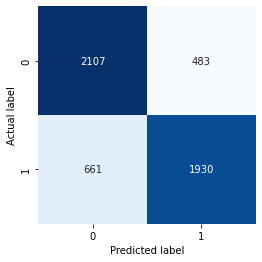

In [13]:

import seaborn as sns
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(df[['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4']])

df['Cluster'] = y

print(df.head())

In [37]:
df= df_subset.drop(['evar23', 'ip','visitday'], axis=1)

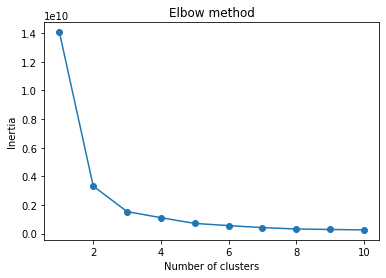

In [45]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [46]:
model = KMeans(n_clusters = 4)
model.fit(df)
model.cluster_centers_


array([[4.54739291e-02, 5.17542159e-02, 5.00135685e-01, 1.07656523e-01,
        8.95433401e+00, 4.60349292e+01, 3.27892227e+00, 4.80934445e+02,
        1.94359372e+00, 2.60256639e+01, 7.27754216e+01, 1.96891115e-16],
       [5.26315789e-02, 5.26315789e-02, 5.78947368e-01, 1.38777878e-17,
        1.25397895e+01, 1.33690000e+04, 4.60000000e+00, 4.87210526e+02,
        2.31578947e+00, 4.04736842e+01, 4.05263158e+01, 1.00000000e+00],
       [3.89610390e-02, 3.89610390e-02, 4.54545455e-01, 5.19480519e-02,
        1.09538987e+01, 7.31033766e+03, 4.24935065e+00, 4.76909091e+02,
        1.88311688e+00, 2.95844156e+01, 4.72987013e+01, 2.00000000e+00],
       [7.69230769e-02, 7.69230769e-02, 3.84615385e-01, 7.69230769e-02,
        8.66392308e+00, 2.07370000e+04, 4.90000000e+00, 4.87692308e+02,
        1.46153846e+00, 1.30000000e+01, 3.18461538e+01, 1.00000000e+00]])

In [47]:
df["kmeans_cluster"] = model.labels_

In [48]:
print(sum(df.loc[df['kmeans_cluster'] == 0].checkoutthankyouflag))
print(sum(df.loc[df['kmeans_cluster'] == 1].checkoutthankyouflag))
print(sum(df.loc[df['kmeans_cluster'] == 2].checkoutthankyouflag))
print(sum(df.loc[df['kmeans_cluster'] == 3].checkoutthankyouflag))

12901
11
35
5
